In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/taxi_trip_data.csv') 

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])


In [ ]:
def ftod(x):
    if (x.hour>=0) & (x.hour<6):
        tod = 'night'
    elif (x.hour>=6) & (x.hour<12):
        tod = 'morning'
    elif (x.hour>=12) & (x.hour<18):
        tod = 'afternoon'
    else:
        tod = 'evening'
    return tod

In [ ]:
df['time_of_day']=df['pickup_datetime'].apply(lambda x:ftod(x))
df['time_of_day']

0        afternoon
1          evening
2          morning
3          evening
4        afternoon
           ...    
11351        night
11352    afternoon
11353      evening
11354        night
11355      morning
Name: time_of_day, Length: 11356, dtype: object

In [ ]:
df['time_of_day']=df['time_of_day'].astype('string')

In [ ]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,time_of_day
0,1,2018-05-11 17:40:16,2018-05-11 17:55:35,1,1.60,1,N,1,11.5,1.0,0.5,0.00,0.0,0.3,13.30,48.0,68.0,afternoon
1,2,2018-03-22 23:01:41,2018-03-22 23:25:36,1,9.52,1,N,1,28.5,0.5,0.5,5.96,0.0,0.3,35.76,138.0,230.0,evening
2,2,2018-07-24 09:58:45,2018-07-24 10:22:37,1,2.17,1,N,1,15.5,0.0,0.5,1.50,0.0,0.3,17.80,234.0,48.0,morning
3,2,2018-12-21 18:28:55,2018-12-21 18:35:45,1,0.86,1,N,2,6.0,1.0,0.5,0.00,0.0,0.3,7.80,79.0,125.0,evening
4,1,2018-08-15 13:58:39,2018-08-15 14:05:25,1,0.30,1,N,2,5.5,0.0,0.5,0.00,0.0,0.3,6.30,233.0,233.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11351,2,2018-07-02 05:56:56,2018-07-02 05:59:44,1,0.82,1,N,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,100.0,230.0,night
11352,2,2018-08-04 13:22:27,2018-08-04 13:31:40,1,1.38,1,N,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,230.0,229.0,afternoon
11353,1,2018-10-15 20:59:40,2018-10-15 21:21:35,1,4.30,1,N,1,18.0,0.5,0.5,3.85,0.0,0.3,23.15,234.0,238.0,evening
11354,1,2018-12-24 01:35:35,2018-12-24 01:57:47,3,4.60,1,N,1,18.0,0.5,0.5,2.00,0.0,0.3,21.30,48.0,232.0,night


read zone data 

bonus

<Figure size 7200x3600 with 0 Axes>

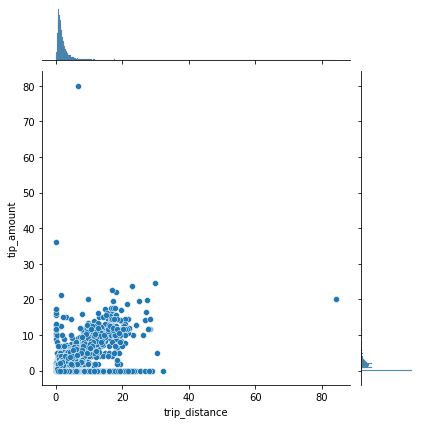

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation between trip_distance and tip Columns
plt.figure(figsize=(100,50))
sns.jointplot(x=df['trip_distance'],y=df['tip_amount'],data=df)

yes as the distance increased in almost 90% of the rides the tip amount also increased

In [ ]:
pip install cassandra-driver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 8.2 MB/s 


In [ ]:
from venv import create
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from pprint import pprint
import pandas as pd
from datetime import date, datetime, timedelta

In [ ]:
cloud_config= {
        'secure_connect_bundle': '/content/secure-connect-ass.zip'
}
auth_provider = PlainTextAuthProvider('iNyCoIrthFDoWWgtNiKYfmWM', 'p4yIgayP3iCrnT.WgZuneHYw9T6Pm24m,vBsWM4UE+i17xpShAb8iGT3N4xQy_sKqTSDArbD0D9HGyvocdSgQXx4vi7e9kGPFyawOQBvg_,qTGWB4jLCZ-ncZYv8ue+b')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
     print(row[0])
else:
    print("An error occurred.")

4.0.0.6816


In [ ]:
session.set_keyspace('ass') 
row = cluster.metadata.keyspaces['ass'] 

pprint(vars(row))

{'aggregates': {},
 'durable_writes': True,
 'functions': {},
 'graph_engine': None,
 'indexes': {},
 'name': 'ass',
 'replication_strategy': <cassandra.metadata.NetworkTopologyStrategy object at 0x7f25011ec150>,
 'tables': {'taxi_trip': <cassandra.metadata.TableMetadataV3 object at 0x7f25011ec1d0>},
 'user_types': {},
 'views': {}}


In [ ]:
df["id"] = df.index + 1
df2 = df.head(50)
print(df2)

    vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0           1 2018-05-11 17:40:16 2018-05-11 17:55:35                1   
1           2 2018-03-22 23:01:41 2018-03-22 23:25:36                1   
2           2 2018-07-24 09:58:45 2018-07-24 10:22:37                1   
3           2 2018-12-21 18:28:55 2018-12-21 18:35:45                1   
4           1 2018-08-15 13:58:39 2018-08-15 14:05:25                1   
5           1 2018-09-11 14:33:24 2018-09-11 15:25:48                1   
6           1 2018-06-13 21:38:08 2018-06-13 22:01:36                1   
7           2 2018-01-10 21:30:17 2018-01-10 21:35:43                1   
8           1 2018-03-19 00:15:56 2018-03-19 00:26:16                2   
9           1 2018-01-22 10:08:40 2018-01-22 10:32:46                1   
10          2 2018-03-15 22:12:26 2018-03-15 22:31:51                5   
11          1 2018-01-21 16:12:52 2018-01-21 16:32:05                1   
12          2 2018-10-16 19:11:28 2018

In [ ]:
#creating table Taxi_trip
session.execute("""
    create table if not exists taxi_trip(
        vendor_id text,
        pickup_datetime timestamp,
        dropoff_datetime timestamp,
        time_of_day text,
        passenger_count int,
        trip_distance float,
        rate_code text,
        store_and_fwd_flag text,
        payment_type text,
        fare_amount float,
        extra float,
        mta_tax float,
        tip_amount float,
        tolls_amount float,
        imp_surcharge float,
        total_amount float,
        pickup_location_id text,
        dropoff_location_id text,
        id text,
        Primary key (id)
 	);
"""
)

In [ ]:
#insertion
for x in range(0, 1000):
    session.execute("insert into taxi_trip(vendor_id,pickup_datetime,dropoff_datetime,time_of_day,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,id) values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s);"
                    , (str(df.loc[x].vendor_id),
                       str(df.loc[x].pickup_datetime),
                        str(df.loc[x].dropoff_datetime),
                        str(df.loc[x].time_of_day),
                        int(df.loc[x].passenger_count),
                        float(df.loc[x].trip_distance),
                       str(df.loc[x].rate_code), 
                       str(df.loc[x].store_and_fwd_flag),
                        str(df.loc[x].payment_type), 
                       float(df.loc[x].fare_amount),
                        float(df.loc[x].extra), 
                       float(df.loc[x].mta_tax),
                        float(df.loc[x].tip_amount), 
                       float(df.loc[x].tolls_amount),
                        float(df.loc[x].imp_surcharge),
                       float(df.loc[x].total_amount),
                        str(df.loc[x].pickup_location_id),
                        str(df.loc[x].dropoff_location_id),
                        str(df.loc[x].id)))


In [ ]:
show_row = session.execute("select * from taxi_trip limit 1")

for row in show_row:
  print(row)

Row(id='631', dropoff_datetime=datetime.datetime(2018, 3, 23, 22, 19), dropoff_location_id='166.0', extra=0.5, fare_amount=11.5, imp_surcharge=0.30000001192092896, mta_tax=0.5, passenger_count=1, payment_type='1', pickup_datetime=datetime.datetime(2018, 3, 23, 22, 7, 50), pickup_location_id='142.0', rate_code='1', store_and_fwd_flag='N', time_of_day='evening', tip_amount=1.2000000476837158, tolls_amount=0.0, total_amount=14.0, trip_distance=3.299999952316284, vendor_id='1')


In [ ]:
#Drop column store_and_fwd_flag
session.execute("ALTER TABLE taxi_trip  DROP store_and_fwd_flag;")
#Drop column rate_code
session.execute("ALTER TABLE taxi_trip  DROP rate_code;")
#Drop column total_amount
session.execute("ALTER TABLE taxi_trip  DROP total_amount;")

In [ ]:
#Drop rows where passenger_count is equal to zero
passengers0 = session.execute("SELECT id FROM taxi_trip WHERE passenger_count= 0 ALLOW FILTERING;")
pc = []
v = 0

for p in passengers0:
  session.execute("DELETE FROM taxi_trip WHERE id='{0}';")
  v += 1
  pc = pc + [p[0]]

print(len(pc))

8


In [ ]:
##check columns are dropped
x= session.execute("select * from taxi_trip limit 1")

for row in x:
    print(row)

Row(id='631', dropoff_datetime=datetime.datetime(2018, 3, 23, 22, 19), dropoff_location_id='166.0', extra=0.5, fare_amount=11.5, imp_surcharge=0.30000001192092896, mta_tax=0.5, passenger_count=1, payment_type='1', pickup_datetime=datetime.datetime(2018, 3, 23, 22, 7, 50), pickup_location_id='142.0', time_of_day='evening', tip_amount=1.2000000476837158, tolls_amount=0.0, trip_distance=3.299999952316284, vendor_id='1')


#get duration

In [ ]:
#adding column duration
session.execute("ALTER TABLE taxi_trip add duration float;")

In [ ]:
##check columns are dropped
x= session.execute("select * from taxi_trip limit 1")

for row in x:
    print(row)

Row(id='631', dropoff_datetime=datetime.datetime(2018, 3, 23, 22, 19), dropoff_location_id='166.0', duration=None, extra=0.5, fare_amount=11.5, imp_surcharge=0.30000001192092896, mta_tax=0.5, passenger_count=1, payment_type='1', pickup_datetime=datetime.datetime(2018, 3, 23, 22, 7, 50), pickup_location_id='142.0', time_of_day='evening', tip_amount=1.2000000476837158, tolls_amount=0.0, trip_distance=3.299999952316284, vendor_id='1')


In [ ]:
from datetime import date, datetime, timedelta

#calculating duration
rows = session.execute("select * from Taxi_trip ")
n = 0
duration = []
for r in rows:
    n = n+1
    duration_calculation = (r[1]-r[10]).seconds/60
    print(duration_calculation)

    session.execute("update Taxi_trip set duration = {0} where id='{1}';".format(duration_calculation,r[0]))

11.166666666666666
9.233333333333333
11.883333333333333
4.483333333333333
18.766666666666666
17.716666666666665
3.2333333333333334
13.1
12.283333333333333
21.433333333333334
6.55
26.2
9.483333333333333
16.3
13.633333333333333
52.4
17.6
13.7
12.95
73.55
39.86666666666667
9.216666666666667
35.93333333333333
11.6
30.966666666666665
4.5
16.633333333333333
14.733333333333333
33.63333333333333
4.5
3.4
16.183333333333334
3.65
2.5833333333333335
28.483333333333334
4.433333333333334
19.666666666666668
5.733333333333333
17.916666666666668
8.083333333333334
13.566666666666666
12.0
1431.2833333333333
5.566666666666666
38.28333333333333
25.283333333333335
14.833333333333334
25.1
13.383333333333333
11.083333333333334
8.4
30.483333333333334
6.933333333333334
9.083333333333334
18.216666666666665
7.4
26.216666666666665
3.4833333333333334
9.183333333333334
3.6166666666666667
5.35
4.716666666666667
0.0
6.45
16.2
23.816666666666666
7.683333333333334
10.85
71.41666666666667
21.85
10.45
6.766666666666667
2.

In [ ]:
##checking duration was added correctly
x= session.execute("select * from taxi_trip limit 1")

for row in x:
    print(row)

Row(id='631', dropoff_datetime=datetime.datetime(2018, 3, 23, 22, 19), dropoff_location_id='166.0', duration=11.166666984558105, extra=0.5, fare_amount=11.5, imp_surcharge=0.30000001192092896, mta_tax=0.5, passenger_count=1, payment_type='1', pickup_datetime=datetime.datetime(2018, 3, 23, 22, 7, 50), pickup_location_id='142.0', time_of_day='evening', tip_amount=1.2000000476837158, tolls_amount=0.0, trip_distance=3.299999952316284, vendor_id='1')


#get total trip cost

In [ ]:
#adding column total trip cost
session.execute("ALTER TABLE taxi_trip ADD total_trip_cost float;")

In [ ]:
#calculating total trip cost
rows = session.execute("select * from Taxi_trip ")
n = 0
dc = []
for r in rows:
    n = n+1
    dc = (r[3] + r[4] + r[5] + r[6] + r[7] + r[8])
    print(dc)

    session.execute("update Taxi_trip set total_trip_cost = {0} where id='{1}';".format(dc,r[0]))

24.966666996479034
19.033333599567413
30.183333218097687
12.283333122730255
39.066666424274445
31.516667187213898
10.533333361148834
25.400000393390656
24.083333790302277
42.233332455158234
14.350000202655792
53.00000077486038
18.783333599567413
37.599999248981476
27.433333218097687
87.20000153779984
31.900000393390656
25.999999821186066
25.249999821186066
127.35000306367874
74.66666489839554
19.51666623353958
58.73333436250687
28.900000393390656
66.2666671872139
12.800000011920929
29.433333218097687
28.033333599567413
60.43333512544632
12.300000011920929
10.20000010728836
31.983332455158234
10.45000010728836
8.383333265781403
49.78333359956741
11.73333340883255
41.46666604280472
17.533333122730255
32.21666604280472
20.383333027362823
27.366666615009308
25.80000001192093
1444.5833252072334
15.866666615009308
72.58333283662796
46.58333283662796
28.133333027362823
53.900000393390656
26.183333218097687
21.383333027362823
22.699999630451202
56.78333359956741
21.73333340883255
22.8833330273

In [ ]:
##checking cost was added correctly
x= session.execute("select * from taxi_trip limit 1")

for row in x:
    print(row)

Row(id='631', dropoff_datetime=datetime.datetime(2018, 3, 23, 22, 19), dropoff_location_id='166.0', duration=11.166666984558105, extra=0.5, fare_amount=11.5, imp_surcharge=0.30000001192092896, mta_tax=0.5, passenger_count=1, payment_type='1', pickup_datetime=datetime.datetime(2018, 3, 23, 22, 7, 50), pickup_location_id='142.0', time_of_day='evening', tip_amount=1.2000000476837158, tolls_amount=0.0, total_trip_cost=24.96666717529297, trip_distance=3.299999952316284, vendor_id='1')


#most common payment type used per time of day

In [ ]:
morning = session.execute("select * from Taxi_trip where time_of_day='morning' ALLOW FILTERING ")
evening = session.execute("select * from Taxi_trip where time_of_day='evening' ALLOW FILTERING ")
afternoon = session.execute("select * from Taxi_trip where time_of_day='afternoon' ALLOW FILTERING ")

payment_type_morning = session.execute("select payment_type from Taxi_trip where time_of_day ='morning' ALLOW FILTERING ")
payment_type_evening = session.execute("select payment_type from Taxi_trip where time_of_day ='evening' ALLOW FILTERING ")
payment_type_afternoon = session.execute("select payment_type from Taxi_trip where time_of_day ='afternoon' ALLOW FILTERING ")


In [ ]:
from collections import Counter
counter = Counter(payment_type_morning)
# most_common()
most_common_element = counter.most_common()
print(most_common_element)  
 

[(Row(payment_type='1'), 154), (Row(payment_type='2'), 76), (Row(payment_type='4'), 2), (Row(payment_type='3'), 1)]


In [ ]:
##most common payment evening
counter_evening = Counter(payment_type_evening)
# most_common()
most_common_element_evening = counter_evening.most_common()
print(most_common_element_evening)  
 

[(Row(payment_type='1'), 236), (Row(payment_type='2'), 100), (Row(payment_type='3'), 1)]


In [ ]:
##most common payment afternoon
counter_afternoon = Counter(payment_type_afternoon)
# most_common()
most_common_element_afternoon = counter_afternoon.most_common()
print(most_common_element_afternoon)  
 

[(Row(payment_type='1'), 196), (Row(payment_type='2'), 130)]


in all 3 times of day method payment 1 is the most used

#average tip per passenger count 

In [ ]:
#get avg for passenger_count = 1
rows1 = session.execute("select AVG (tip_amount) from Taxi_trip where passenger_count=1 ALLOW FILTERING ")
#get avg for passenger_count = 2
rows2 = session.execute("select AVG (tip_amount) from Taxi_trip where passenger_count=2 ALLOW FILTERING ")
#get avg for passenger_count = 3
rows3 = session.execute("select AVG (tip_amount) from Taxi_trip where passenger_count=3 ALLOW FILTERING ")
#get avg for passenger_count = 4
rows4 = session.execute("select AVG (tip_amount) from Taxi_trip where passenger_count=4 ALLOW FILTERING ")
#get avg for passenger_count = 5
rows5 = session.execute("select AVG (tip_amount) from Taxi_trip where passenger_count=5 ALLOW FILTERING ")
#get avg for passenger_count = 6
rows6 = session.execute("select AVG (tip_amount) from Taxi_trip where passenger_count=6 ALLOW FILTERING ")
print(rows1[0])
print(rows2[0])
print(rows3[0])
print(rows4[0])
print(rows5[0])
print(rows6[0])

Row(system_avg_tip_amount=1.774187684059143)
Row(system_avg_tip_amount=1.4951049089431763)
Row(system_avg_tip_amount=1.7496227025985718)
Row(system_avg_tip_amount=1.6469999551773071)
Row(system_avg_tip_amount=1.8574467897415161)
Row(system_avg_tip_amount=1.7586666345596313)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultS

#best 5 locations for drivers to pick up passengers from

create table zone

In [ ]:
dfZone = pd.read_csv('/content/taxi_zone_geo.csv') 

In [ ]:
dfZone.shape

(263, 4)

In [ ]:
dfZone

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
...,...,...,...,...
258,206,Saint George/New Brighton,Staten Island,"POLYGON((-74.0825658580711 40.6483158193535, -..."
259,214,South Beach/Dongan Hills,Staten Island,"POLYGON((-74.085787808 40.5958840799999, -74.0..."
260,221,Stapleton,Staten Island,"POLYGON((-74.076017768 40.6377481049999, -74.0..."
261,245,West Brighton,Staten Island,"POLYGON((-74.0992883379999 40.640204723, -74.0..."


In [ ]:
dfZone['zone_name'].unique

<bound method Series.unique of 0                 Newark Airport
1        Allerton/Pelham Gardens
2                   Bedford Park
3                        Belmont
4                     Bronx Park
                 ...            
258    Saint George/New Brighton
259     South Beach/Dongan Hills
260                    Stapleton
261                West Brighton
262                  Westerleigh
Name: zone_name, Length: 263, dtype: object>

In [ ]:
#creating table taxi_zone
session.execute("""
    create table if not exists taxi_zone(
        zone_id text,
        zone_name text,
        borough text,
        zone_geom text,
        Primary key (zone_id)
 	);
"""
)

In [ ]:
##insert in table
for x in range(0, 263):
    session.execute("insert into taxi_zone(zone_id,zone_name,borough,zone_geom) values (%s,%s,%s,%s);"
                    ,  (str(dfZone.loc[x].zone_id),
                       str(dfZone.loc[x].zone_name),
                        str(dfZone.loc[x].borough),
                        str(dfZone.loc[x].zone_geom)))


In [ ]:
zone_name = session.execute("select pickup_location_id from Taxi_trip ")


In [ ]:
from collections import Counter
counterzone = Counter(zone_name)
# most_common()
most_common_element_zone = counterzone.most_common()
print(most_common_element_zone)  

[(Row(pickup_location_id='161.0'), 47), (Row(pickup_location_id='237.0'), 44), (Row(pickup_location_id='186.0'), 37), (Row(pickup_location_id='162.0'), 36), (Row(pickup_location_id='234.0'), 35), (Row(pickup_location_id='170.0'), 34), (Row(pickup_location_id='79.0'), 32), (Row(pickup_location_id='163.0'), 31), (Row(pickup_location_id='48.0'), 30), (Row(pickup_location_id='132.0'), 30), (Row(pickup_location_id='230.0'), 29), (Row(pickup_location_id='236.0'), 28), (Row(pickup_location_id='138.0'), 28), (Row(pickup_location_id='142.0'), 26), (Row(pickup_location_id='264.0'), 24), (Row(pickup_location_id='107.0'), 24), (Row(pickup_location_id='249.0'), 22), (Row(pickup_location_id='68.0'), 22), (Row(pickup_location_id='238.0'), 22), (Row(pickup_location_id='164.0'), 21), (Row(pickup_location_id='90.0'), 19), (Row(pickup_location_id='229.0'), 19), (Row(pickup_location_id='141.0'), 18), (Row(pickup_location_id='140.0'), 18), (Row(pickup_location_id='263.0'), 18), (Row(pickup_location_id='113

In [ ]:
zone_name1 = session.execute("select zone_name from Taxi_zone where zone_id='161'")
zone_name1[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  


Row(zone_name='Midtown Center')

In [ ]:
zone_name2 = session.execute("select zone_name from Taxi_zone where zone_id='237'")
zone_name2[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  


Row(zone_name='Upper East Side South')

In [ ]:
zone_name3 = session.execute("select zone_name from Taxi_zone where zone_id='186'")
zone_name3[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  


Row(zone_name='Penn Station/Madison Sq West')

In [ ]:
zone_name4 = session.execute("select zone_name from Taxi_zone where zone_id='162'")
zone_name4[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  


Row(zone_name='Midtown East')

In [ ]:
zone_name5 = session.execute("select zone_name from Taxi_zone where zone_id='234'")
zone_name5[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: ResultSet indexing support will be removed in 4.0. Consider using ResultSet.one() to get a single row.
  


Row(zone_name='Union Sq')